<a href="https://colab.research.google.com/github/ptrBoguski/MACD/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from collections import Counter
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
%matplotlib inline
batch_size = 64
digits = 10 
epochs = 20
input_shape = (28, 28, 1)

In [ ]:
#load and reshape data
train = pd.read_csv("/content/input/train.csv")
test = pd.read_csv("/content/input/test.csv")
train_pixels = (train.iloc[:,1:].values).astype('float32')
train_labels = train.iloc[:,0].values.astype('int32') 
test_pixels = test.values.astype('float32')
train_pixels = train_pixels/255.0 #normalise to 0.0 - 1.0
test_pixels = test_pixels/255.0
train_pixels = train_pixels.reshape(train_pixels.shape[0], 28, 28,1)
test_pixels = test_pixels.reshape(test_pixels.shape[0], 28, 28,1)

In [ ]:
train_labels = keras.utils.to_categorical(train_labels, digits)
train_pixels, train_val, train_labels, label_val = train_test_split(train_pixels, train_labels, test_size = 0.1, random_state=42)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.20))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)

datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False, 
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        rotation_range=15,
        zoom_range = 0.1, 
        width_shift_range=0.1, 
        height_shift_range=0.1, 
        horizontal_flip=False, 
        vertical_flip=False)

model.summary()





Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)         

In [ ]:
datagen.fit(train_pixels)
h = model.fit(datagen.flow(train_pixels,train_labels, batch_size=batch_size),
                              epochs = epochs, validation_data = (train_val,label_val),
                              verbose = 1, steps_per_epoch=train_pixels.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction],)


Epoch 1/20
590/590 [==============================] - 118s 198ms/step - loss: 0.7005 - accuracy: 0.7750 - val_loss: 0.0572 - val_accuracy: 0.9829
Epoch 2/20
590/590 [==============================] - 118s 199ms/step - loss: 0.1121 - accuracy: 0.9653 - val_loss: 0.0424 - val_accuracy: 0.9874
Epoch 3/20
590/590 [==============================] - 117s 198ms/step - loss: 0.0902 - accuracy: 0.9732 - val_loss: 0.0400 - val_accuracy: 0.9871
Epoch 4/20
590/590 [==============================] - 116s 197ms/step - loss: 0.0679 - accuracy: 0.9800 - val_loss: 0.0517 - val_accuracy: 0.9831
Epoch 5/20
590/590 [==============================] - 117s 199ms/step - loss: 0.0636 - accuracy: 0.9796 - val_loss: 0.0236 - val_accuracy: 0.9926
Epoch 6/20
590/590 [==============================] - 117s 199ms/step - loss: 0.0548 - accuracy: 0.9829 - val_loss: 0.0270 - val_accuracy: 0.9917
Epoch 7/20
590/590 [==============================] - 117s 199ms/step - loss: 0.0519 - accuracy: 0.9830 - val_loss: 0.0404 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


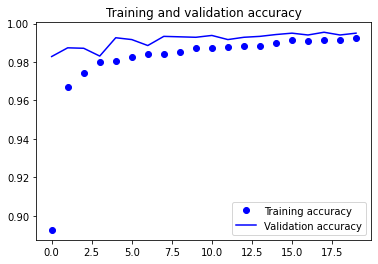

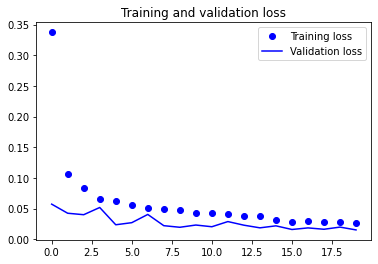

In [ ]:
print(h.history.keys())
accuracy = h.history['accuracy']
val_accuracy = h.history['val_accuracy']
loss = h.history['loss']
val_loss = h.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()